In [110]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

###  1. Calibrate Camera. 2 hrs. Using the “Calibrate Camera by ChatGPT” program shown in class, calibrate your laptop or mobile phone camera to find its intrinsic parameters using 10-15 checkerboard images. Make sure you are not using mirror images. If the processing is slow, it may help to reduce the size of each image to a width of around 1,000.

In [111]:
import glob
images1 = glob.glob('img1/*.jpg')
print('Images1 found: ', images1)
imagesleft = glob.glob('imgleft/*.jpg')
print('Imagesleft found: ', imagesleft)
imagesframes = glob.glob('imgframe/*.png')
print('Imagesframes found: ', imagesframes)

Images1 found:  ['img1\\img00.jpg', 'img1\\img01.jpg', 'img1\\img02.jpg', 'img1\\img03.jpg', 'img1\\img04.jpg', 'img1\\img05.jpg', 'img1\\img06.jpg', 'img1\\img07.jpg', 'img1\\img08.jpg', 'img1\\img09.jpg', 'img1\\img10.jpg', 'img1\\img11.jpg']
Imagesleft found:  ['imgleft\\left01.jpg', 'imgleft\\left02.jpg', 'imgleft\\left03.jpg', 'imgleft\\left04.jpg', 'imgleft\\left05.jpg', 'imgleft\\left06.jpg', 'imgleft\\left07.jpg', 'imgleft\\left08.jpg', 'imgleft\\left09.jpg', 'imgleft\\left10.jpg', 'imgleft\\left11.jpg', 'imgleft\\left12.jpg', 'imgleft\\left13.jpg']
Imagesframes found:  ['imgframe\\frame-1.png', 'imgframe\\frame-10.png', 'imgframe\\frame-11.png', 'imgframe\\frame-12.png', 'imgframe\\frame-2.png', 'imgframe\\frame-3.png', 'imgframe\\frame-4.png', 'imgframe\\frame-5.png', 'imgframe\\frame-6.png', 'imgframe\\frame-7.png', 'imgframe\\frame-8.png', 'imgframe\\frame-9.png']


In [112]:
image1 =[]
imageleft =[]
imageframe =[]
for i in range(len(images1)):
    img1 = cv.imread(images1[i])
    imgleft = cv.imread(imagesleft[i])
    imgframe = cv.imread(imagesframes[i])

    image1.append(img1)
    imageleft.append(imgleft)
    imageframe.append(imgframe)

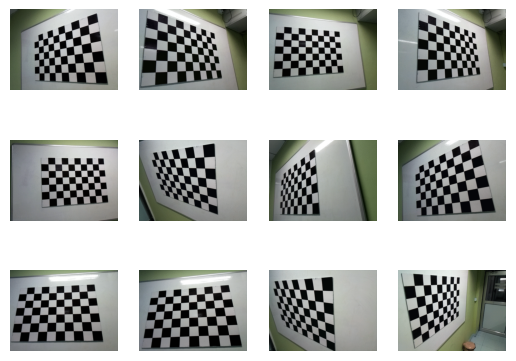

In [113]:
#show all image
for i in range(len(imageframe)):
    plt.subplot(3,4,i+1)
    plt.imshow(imageframe[i])
    plt.axis('off')

plt.show()

#### 1.1. [10 points.] Report the fx, fy, cx, cy, and lens distortion (k1, k2, k3, p1, p2) parameters found using left##.jpg, frame-##.png, and your camera’s images.

In [134]:
def find_frame(fname, s):
    # Define the size of the checkerboard
    checkerboard_size = (9, 6)
    image_points = []
    object_points = []

    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, checkerboard_size, None)
    if ret:
        image_points.append(corners)
        object_points.append(np.zeros((checkerboard_size[0]*checkerboard_size[1], 3), np.float32))
        object_points[-1][:,:2] = np.mgrid[0:checkerboard_size[0],0:checkerboard_size[1]].T.reshape(-1,2)
        # Calibrate the camera
        width = gray.shape[1]
        height = gray.shape[0]
        ret, mtx, dist, rvec, tvec = cv.calibrateCamera(object_points, image_points, (width, height), None, None)
        if s == 1:
            return mtx, dist
        else:
            print("name: ", fname)
            print("Camera matrix:\n", mtx)
            print("Distortion coefficients:\n", dist)
            print("---------------------------------")
    else:
        print('No checkerboard found in image: ', fname)
        print("---------------------------------")

In [135]:
select = 2# 0: img1, 1: imgleft, 2: imgframe
if select == 0:
    for fname in images1:
        find_frame(fname,0)
elif select == 1:
    for fname in imagesleft:
        find_frame(fname,0)
elif select == 2:
    for fname in imagesframes:
        find_frame(fname,0)
else:
    print('Select error')

name:  imgframe\frame-1.png
Camera matrix:
 [[358.39885759   0.         200.21464065]
 [  0.         336.50253611 146.87533692]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[ 0.24688321 -0.40226514  0.00111484 -0.00827511 -0.82766343]]
---------------------------------
No checkerboard found in image:  imgframe\frame-10.png
---------------------------------
name:  imgframe\frame-11.png
Camera matrix:
 [[306.5429501    0.         187.27690233]
 [  0.         303.72403131 149.17383844]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[ 0.21947546 -0.70409782 -0.00187497 -0.0049618   0.65313079]]
---------------------------------
No checkerboard found in image:  imgframe\frame-12.png
---------------------------------
name:  imgframe\frame-2.png
Camera matrix:
 [[360.40250632   0.         213.72092297]
 [  0.         361.97541072 150.03976505]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[ 1.49332002e-01  7.27145605e-01 

#### 1.2. [10 points.] Show the Original and Undistorted image for one of your checkerboard images. Draw straight lines across the original image and undistorted image to see if the distortion has improved.

In [116]:
# select img1/img04.jpg
# # Undistort the image using the camera matrix and distortion coefficients
img = cv.imread('img1/img04.jpg')
mtx, dist = find_frame('img1/img04.jpg',1)
# Undistort the image using the camera matrix and distortion coefficients
undistorted = cv.undistort(img, mtx, dist)
# Draw lines across the original and undistorted images
# to see if the distortion has improved
h, w = img.shape[:2]
# define the points to draw lines
line_pts = np.array([[0, h//2], [w-1, h//2]], np.int32).reshape((-1, 1, 2))
# draw the lines
cv.polylines(img, [line_pts], True, (0, 0, 255), thickness=2)
cv.polylines(undistorted, [line_pts], True, (0, 0, 255), thickness=2)

# Display the original and undistorted images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(undistorted)
plt.title('Undistorted')
plt.axis('off')
plt.show()

TypeError: list indices must be integers or slices, not tuple